In [1]:
import os
import sys
import librosa
import seaborn as sn
sys.path.append(os.path.abspath(os.path.join('../scripts')))
#sys.path.insert(0,'../scripts' )
from audio_loader import AudioLoader
from audio_manuplator import AudioManipulator
import visualize as vis
from results_pickler import ResultPickler
# import audio_manuplator as am
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
sys.path

['/home/eyerusalem/Documents/AMH-STT/notebooks',
 '/home/eyerusalem/.vscode/extensions/ms-toolsai.jupyter-2021.8.1054968649/pythonFiles',
 '/home/eyerusalem/.vscode/extensions/ms-toolsai.jupyter-2021.8.1054968649/pythonFiles/lib/python',
 '/home/eyerusalem/anaconda3/lib/python38.zip',
 '/home/eyerusalem/anaconda3/lib/python3.8',
 '/home/eyerusalem/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/home/eyerusalem/anaconda3/lib/python3.8/site-packages',
 '/home/eyerusalem/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg',
 '/home/eyerusalem/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/eyerusalem/.ipython',
 '/home/eyerusalem/Documents/AMH-STT/scripts']

In [3]:
al_train = AudioLoader(directory='../data/train')

# al_test = AudioLoader(directory="../data/test",tts_file=r'/trsTest.txt')


AudioExplorer:INFO->Successfully Created AudioExplorer Class
AudioExplorer:INFO->Successfully Loaded Audio and TTS files


In [4]:
df_train_audio_data = al_train.get_audio_info_with_data()
# df_test_audio_data = al_test.get_audio_info_with_data()
# rp = ResultPickler()
# rp.load_data("../models/LoadedAudioInfo.pkl")
# data_dict = rp.get_data()
# # data_dict.keys()
# df_train_audio_data = data_dict['TrainAudioInfoWithoutTTS']
df_train_audio_data


Name Channel  Duration(sec)  Frequency(Hz)  ZeroCrossings  \
0     tr_10452_tr06107  Stereo          3.901          16000              0   
1     tr_10400_tr23102  Stereo          2.601          16000             16   
2     tr_10709_tr03126  Stereo          2.601          16000              6   
3     tr_10423_tr23125  Stereo          2.879          16000             20   
4     tr_10438_tr23140  Stereo          2.694          16000             26   
..                 ...     ...            ...            ...            ...   
995   tr_10706_tr03123  Stereo          3.158          16000              0   
996  tr_10151_tr098113  Stereo          4.272          16000            162   
997     tr_110_tr02010  Stereo          3.437          16000            916   
998   tr_10834_tr09108  Stereo          3.158          16000             60   
999  tr_10243_tr099085  Stereo          3.065          16000             18   

     MinAmplitude  MaxAmplitude  AmplitudeMean  AmplitudeMedian  HasTTS  \
0          -0.269        -0.015         -0.125           -0.126    True   
1          -0.282         0.052         -0.125           -0.127    True   
2          -0.358         0.018         -0.125           -0.126    True   
3          -0.251         0.018         -0.125           -0.126    True   
4          -0.424         0.184         -0.125           -0.126    True   
..            ...           ...            ...              ...     ...   
995        -0.232        -0.008         -0.125           -0.126    True   
996        -0.556         0.124         -0.124           -0.125    True   
997        -0.088         0.056         -0.005           -0.005    True   
998        -0.364         0.042         -0.125           -0.126    True   
999        -0.343         0.044         -0.125           -0.126    True   

                                                   TTS  
0     ሚስት አ ግብተው ሶስት ልጆች በት ነው የ ጠፉት ቄስ ፊሊ ጶ ስ ደብር ተገኙ  
1                    ጓደኛ ዪቱ ብ ዪ ተ ብላ ብት ለመ ንም እሺ አ ላለች  
2                                 አንበሳ ስጋ ስላ የ አጉረመረ መ  
3                      ዘነበ ች ሰራተኛዋ ን አታ ን ጓጉ ብላ ተቆጣ ቻት  
4                    ሸክላ ሰሪዋ አ ለሚ ቱ በ ጉልቻ ስራዋ የታወቀች ነች  
..                                                 ...  
995                         ኤጲስ ቆጶስ ቱ ትላንትና ተሰብስበው ነበር  
996  ት ግስት እህቷ ን ስት ጓጉ ክረ ሚ እንጂ የኔ ን አይነት ሀብል አይገዛ ...  
997                    እስራኤል የ ኢትዮጵያ ደጋፊ ና ት በ ማለት ወቀሱ  
998            ደርግ ካሳጣ ን ምርጥ ኢትዮጵያውያ ኖች አንዱ ና ሆ ሰናይ ነው  
999              ጣት ሽን አን ቋ ቂው ም አታንቋቂ ውም ማ ንም አላ የ ሽም  

[1000 rows x 11 columns]

In [15]:

# instantiate audio manuplator class
am_train = AudioManipulator(df_train_audio_data)


AttributeError: 'AudioManipulator' object has no attribute 'get_audio_files'

In [13]:
# Plot Time Series data of 
vis.plot_series(df_train_audio_data.loc[0,"TimeSeriesData"])


KeyError: 'TimeSeriesData'

## Preprocessing the audio Data
- ### change the duration to the same size
- ### convert channels to stereo by duplicating the other channel
- ### standardize the sampling rate to the same one
- ### Data Augmentation
- ### Extract Features



### Convert Channels to Stereo by duplicating the other channel


In [15]:
am_train.convert_stereo_audio()
am_train.get_audio_info()

Empty DataFrame
Columns: [Name, Duration, Channels, SamplingRate, TimeSeriesData, HasTTS]
Index: []

In [16]:
# am_train.get_audio_info().head().loc[0,"TimeSeriesData"].shape
num_rows, y_len = am_train.get_audio_info().loc[0,"TimeSeriesData"].shape
num_rows,y_len

KeyError: 0

### Change the duration to the same size
From Our Data Exploration, we found that most frequent audio files has a duration between 2 to 6. And to reduce the bias, we will pad all the audio to make it equal in length with the maximum.

In [8]:
am_train.resize_audio()


211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
2

211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0
211024.0


In [9]:
am_train.get_audio_info()

Name  Duration Channels  SamplingRate  \
0     tr_10577_tr30138      9.57   Stereo         16000   
1     tr_10617_tr04131      9.57   Stereo         16000   
2     tr_10399_tr23101      9.57   Stereo         16000   
3    tr_10379_tr100101      9.57   Stereo         16000   
4    tr_10171_tr099013      9.57   Stereo         16000   
..                 ...       ...      ...           ...   
994    tr_1016_tr11017      9.57   Stereo         16000   
995  tr_10054_tr098016      9.57   Stereo         16000   
996      tr_10_tr01010      9.57   Stereo         16000   
997  tr_10370_tr100092      9.57   Stereo         16000   
998    tr_1096_tr11097      9.57   Stereo         16000   

                                        TimeSeriesData  HasTTS  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
..                                                 ...     ...  
994  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
995  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
996  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
997  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
998  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  

[999 rows x 6 columns]

In [10]:
am_train.get_audio_info().loc[0,"TimeSeriesData"].shape

(2, 211024)

### Standardize Sampling Rate

In [11]:
# count sampling rate frequencies
pd.DataFrame({"count": df_train_audio_data.groupby("SamplingRate")["SamplingRate"].count()})


count
SamplingRate       
16000           999

In [12]:
am_train.resample_audio()

In [13]:
am_train.get_audio_info()

Name  Duration Channels  SamplingRate  \
0     tr_10577_tr30138      9.57   Stereo         22500   
1     tr_10617_tr04131      9.57   Stereo         22500   
2     tr_10399_tr23101      9.57   Stereo         22500   
3    tr_10379_tr100101      9.57   Stereo         22500   
4    tr_10171_tr099013      9.57   Stereo         22500   
..                 ...       ...      ...           ...   
994    tr_1016_tr11017      9.57   Stereo         22500   
995  tr_10054_tr098016      9.57   Stereo         22500   
996      tr_10_tr01010      9.57   Stereo         22500   
997  tr_10370_tr100092      9.57   Stereo         22500   
998    tr_1096_tr11097      9.57   Stereo         22500   

                                        TimeSeriesData  HasTTS  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
..                                                 ...     ...  
994  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
995  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
996  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
997  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  
998  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    True  

[999 rows x 6 columns]

### Our SamplingRate is the same all around our data but we have resampled it to 44100. Now we have our processed data, we will save the preprocessed files to a folder in a .wav format. 

 

In [14]:
am_train.write_wave_files("../data/train/wav/")

## Augmentation

## Feature Extraction
### We can now extract features but first we convert back to mono since the librosa library expects a monochannel audio.

In [24]:

# features = am_train.extract_features()

/home/dibora/AMH-STT/STT/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=132
  n_fft, y.shape[-1]


In [25]:
# features.head()

Name                                      Melspectogram  \
0    tr_1003_tr11004  [[2.7900546], [0.041047245], [0.0005915265], [...   
1   tr_10577_tr30138  [[82.89139], [1.2032433], [0.15116173], [0.045...   
2   tr_10617_tr04131  [[81.84967], [1.2774433], [0.1626715], [0.1271...   
3   tr_10399_tr23101  [[85.895645], [1.2551126], [0.038612414], [0.0...   
4  tr_10379_tr100101  [[86.75957], [1.2598524], [0.12583095], [0.034...   

                                    Melspectogram_db  
0  [[0.0], [-18.323288], [-36.736385], [-46.55433...  
1  [[-1.9073486e-06], [-18.381561], [-27.390676],...  
2  [[0.0], [-18.066753], [-27.017056], [-28.08648...  
3  [[0.0], [-18.352884], [-33.472443], [-44.09732...  
4  [[1.9073486e-06], [-18.379976], [-28.385298], ...

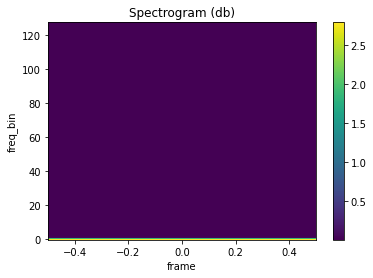

In [26]:
# vis.plot_spectrogram(features.loc[0,'Melspectogram'])

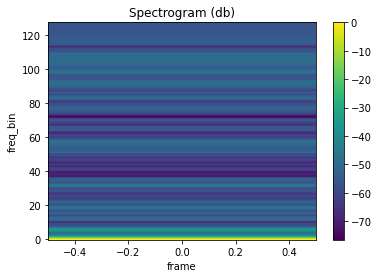

In [27]:
# vis.plot_spectrogram(features.loc[0,'Melspectogram_db'])